In [1]:
# Import important libs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')


In [3]:
# read the input files and look at the top few lines #
#data_path = "dataset/2008_2018/"
match_df = pd.read_csv("matches.csv")
score_df = pd.read_csv("deliveries.csv")
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# Let us get some basic stats #
print("Number of matches played so far : ", match_df.shape[0])
print("Number of seasons : ", len(match_df.season.unique()))

Number of matches played so far :  696
Number of seasons :  11


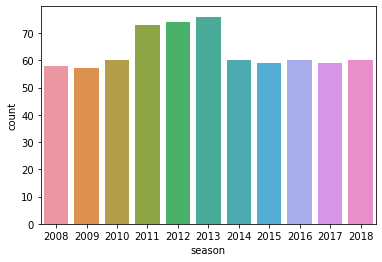

In [5]:
#number of matches in each season
sns.countplot(x='season', data=match_df)
plt.show()

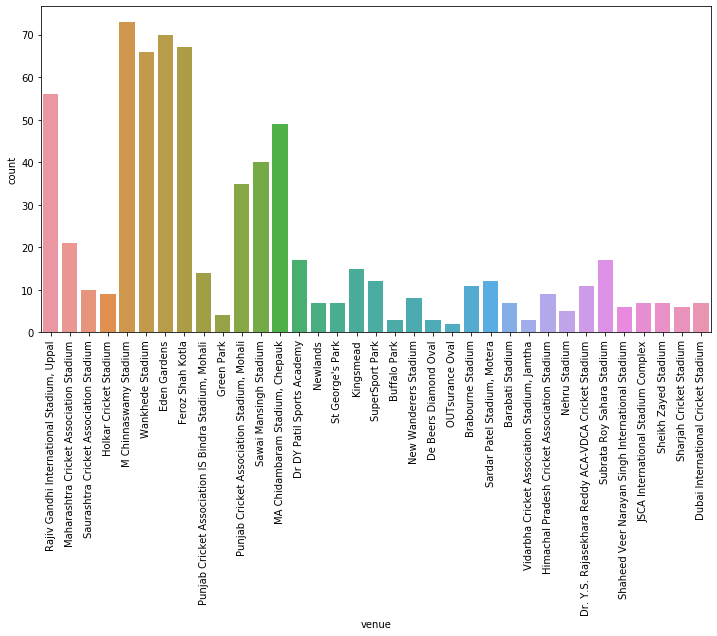

In [6]:
#number of matches played in each venue
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

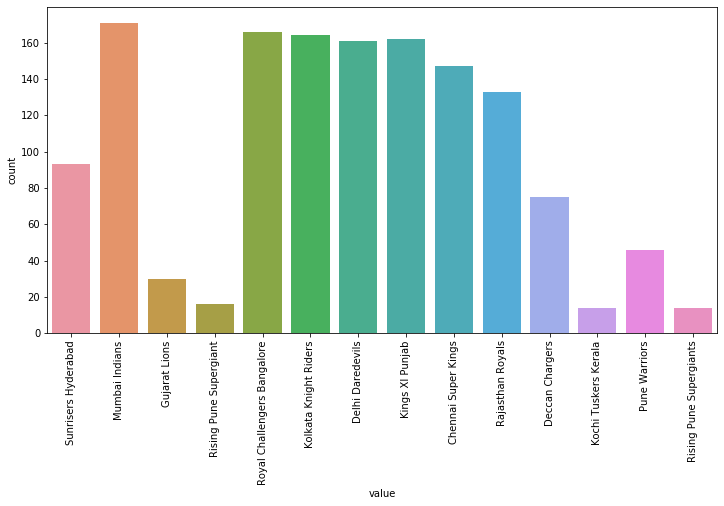

In [7]:
#number of matches played in each team
temp_df = pd.melt(match_df, id_vars=['id','season'], value_vars=['team1', 'team2'])

plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

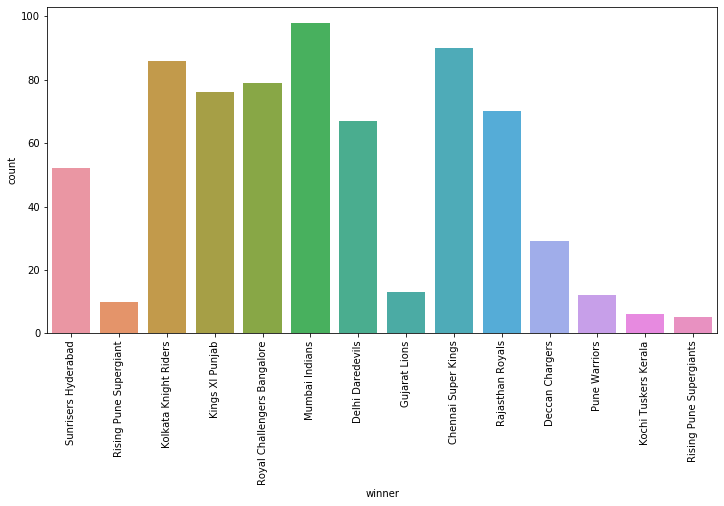

In [8]:
#number of wins per team
plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

In [9]:
#title holders each season
temp_df = match_df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


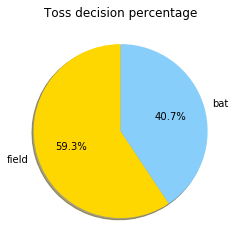

In [10]:
#toss decision
temp_series = match_df.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

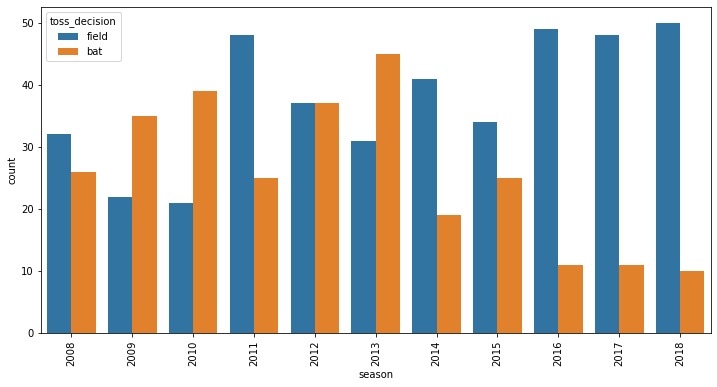

In [11]:
#let us see how this decision has varied about time
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

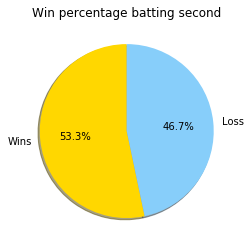

In [12]:
#win percentage of teams batting second
num_of_wins = (match_df.win_by_wickets>0).sum()
num_of_loss = (match_df.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


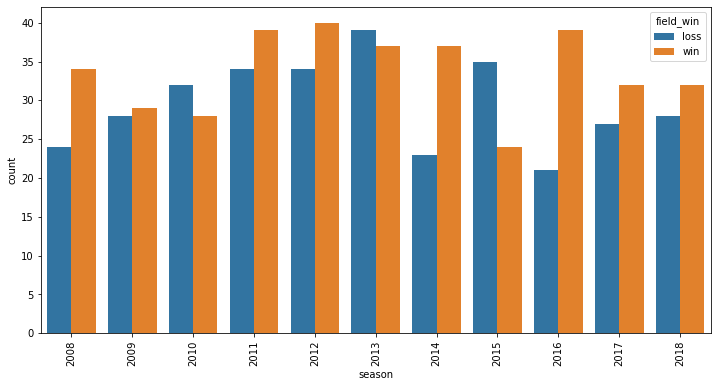

In [14]:
#So percentage of times teams batting second has won is 53.2. Now let us split this by year and see the distribution.
match_df["field_win"] = "win"
match_df["field_win"].ix[match_df['win_by_wickets']==0] = "loss"
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='field_win', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

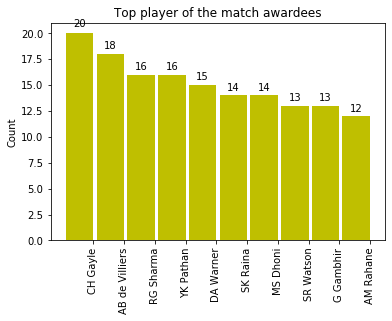

In [15]:
#top players of the match

temp_series = match_df.player_of_match.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='y')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
autolabel(rects)
plt.show()

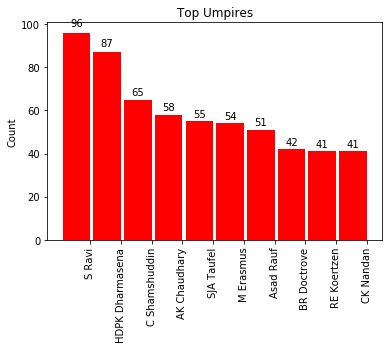

In [16]:
#top umpires
temp_df = pd.melt(match_df, id_vars=['id'], value_vars=['umpire1', 'umpire2'])

temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='r')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
autolabel(rects)
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


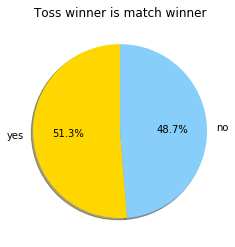

In [17]:
'''
How lucky are the toss winning teams?:

Now let us see how lucky is the toss winner. Do they often end up on the winning side?! Let us see
'''
match_df['toss_winner_is_winner'] = 'no'
match_df['toss_winner_is_winner'].ix[match_df.toss_winner == match_df.winner] = 'yes'
temp_series = match_df.toss_winner_is_winner.value_counts()

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss winner is match winner")
plt.show()

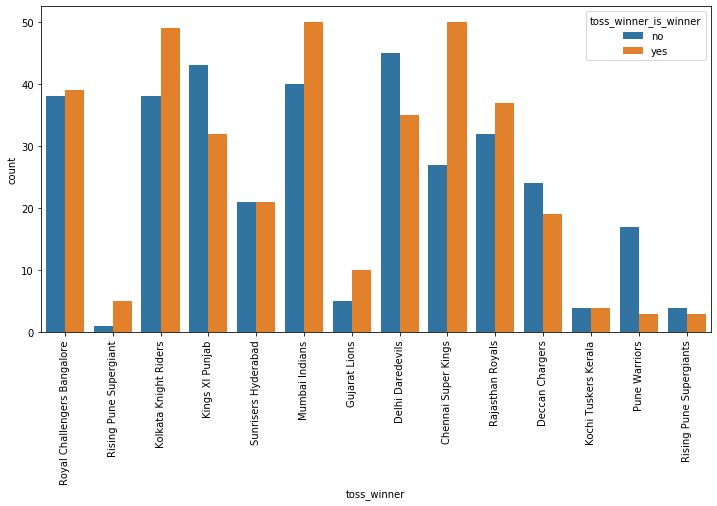

In [18]:
#Let us also look at the team wise break up. If the team wins the toss, will it end up in the winning side. Will be interesting to see.
plt.figure(figsize=(12,6))
sns.countplot(x='toss_winner', hue='toss_winner_is_winner', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

In [19]:
#top few rows of the scores dataset

score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


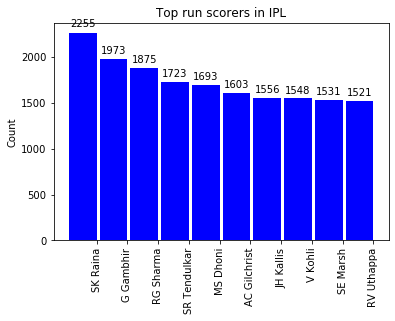

In [20]:
#batsman analysis
temp_df = score_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
autolabel(rects)
plt.show()

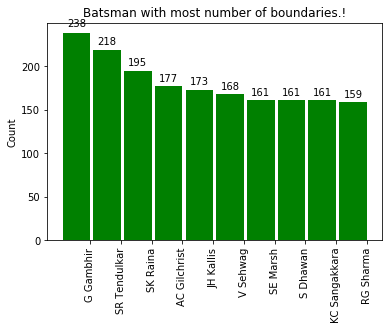

In [21]:
#players with the most number of boundries in IPL
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!")
autolabel(rects)
plt.show()

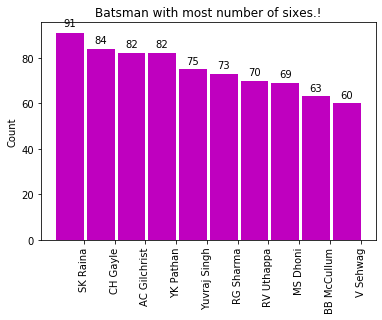

In [22]:
#batsman with most number of sixes
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
autolabel(rects)
plt.show()

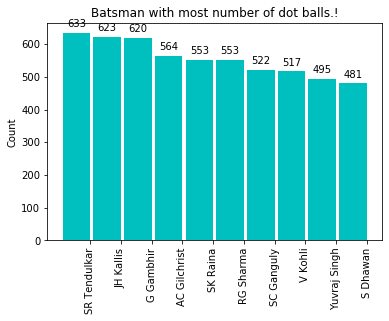

In [23]:
#batsman who have played the most number of dotballs
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='c')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of dot balls.!")
autolabel(rects)
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


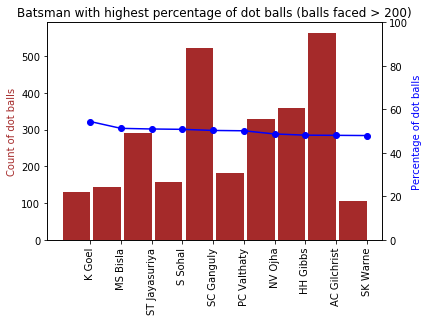

In [24]:
#percentage distribution
def balls_faced(x):
    return len(x)

def dot_balls(x):
    return (x==0).sum()

temp_df = score_df.groupby('batsman')['batsman_runs'].agg([balls_faced, dot_balls]).reset_index()
temp_df = temp_df.ix[temp_df.balls_faced>200,:]
temp_df['percentage_of_dot_balls'] = (temp_df['dot_balls'] / temp_df['balls_faced'])*100.
temp_df = temp_df.sort_values(by='percentage_of_dot_balls', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
rects = ax1.bar(ind, np.array(temp_df['dot_balls']), width=width, color='brown')
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Count of dot balls", color='brown')
ax1.set_title("Batsman with highest percentage of dot balls (balls faced > 200)")
ax2.plot(ind+0.45, np.array(temp_df['percentage_of_dot_balls']), color='b', marker='o')
ax2.set_ylabel("Percentage of dot balls", color='b')
ax2.set_ylim([0,100])
ax2.grid(b=False)
plt.show()

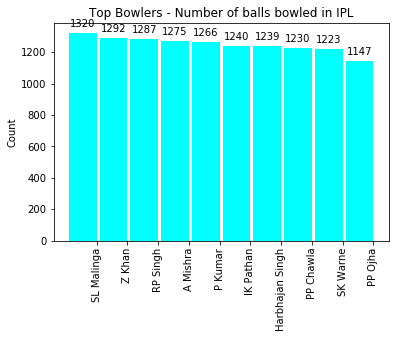

In [25]:
#players who have bowled the most number of balls
temp_df = score_df.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['ball']), width=width, color='cyan')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
autolabel(rects)
plt.show()

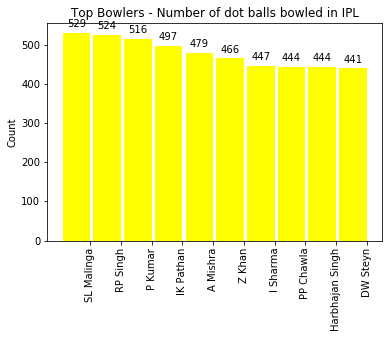

In [26]:
#bowlers with the most number of dotballs
temp_df = score_df.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='yellow')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
autolabel(rects)
plt.show()

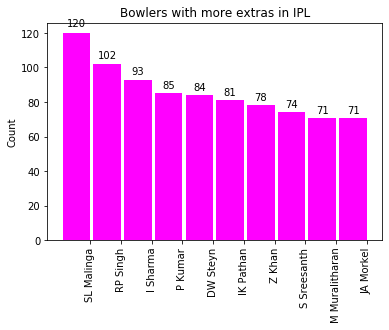

In [27]:
#most number of extras

temp_df = score_df.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width, color='magenta')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL")
autolabel(rects)
plt.show()

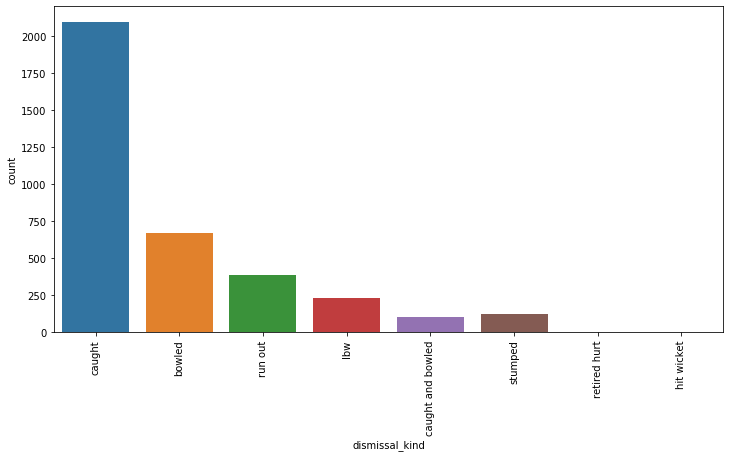

In [28]:
#most comman dismisal types
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=score_df)
plt.xticks(rotation='vertical')
plt.show()